### 导入工具包

In [6]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 指定好数据路径（训练和验证）

In [7]:
# 数据所在文件夹
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### 构建卷积神经网络模型

In [8]:
model = tf.keras.models.Sequential([
    #如果训练慢，可以把数据设置的更小一些
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #为全连接层准备
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    # 二分类sigmoid就够了
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

### 配置训练器

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

### 数据预处理

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # 文件夹路径
        target_size=(64, 64),  # 指定resize成的大小
        batch_size=20,
        # 如果one-hot就是categorical，二分类用binary就可以
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 训练网络模型

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 - 6s - loss: 0.6919 - acc: 0.5315 - val_loss: 0.6730 - val_acc: 0.6490
Epoch 2/20
100/100 - 5s - loss: 0.6710 - acc: 0.5845 - val_loss: 0.6567 - val_acc: 0.6050
Epoch 3/20
100/100 - 5s - loss: 0.6360 - acc: 0.6380 - val_loss: 0.6189 - val_acc: 0.6690
Epoch 4/20
100/100 - 5s - loss: 0.5975 - acc: 0.6880 - val_loss: 0.6023 - val_acc: 0.6590
Epoch 5/20
100/100 - 5s - loss: 0.5523 - acc: 0.7240 - val_loss: 0.5961 - val_acc: 0.6860
Epoch 6/20
100/100 - 5s - loss: 0.5267 - acc: 0.7405 - val_loss: 0.6148 - val_acc: 0.6630
Epoch 7/20
100/100 - 5s - loss: 0.4906 - acc: 0.7625 - val_loss: 0.5563 - val_acc: 0.7080
Epoch 8/20
100/100 - 5s - loss: 0.4584 - acc: 0.7955 - val_loss: 0.5562 - val_acc: 0.7090
Epoch 9/20
100/100 - 5s - loss: 0.4435 - acc: 0.7895 - val_loss: 0.5518 - val_acc: 0.7150
Epoch 10/20
100/100 - 5s - loss: 0.4199 - acc: 0.8035 - val_loss: 0.5671 - val_acc: 0.7090
Epoch 11/20
100/100 - 5

### 效果展示

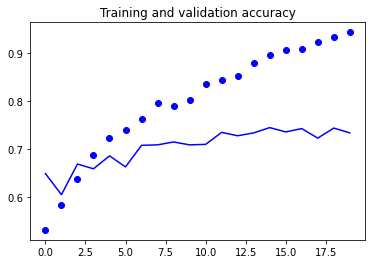

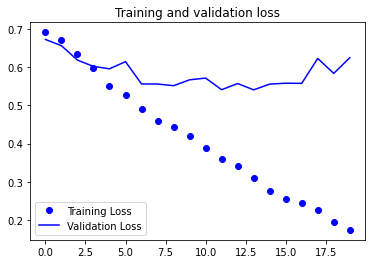

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

看起来完全过拟合了，如何解决呢？

### 保存模型并预测

In [15]:
#保存模型
model.save(r'./model/catsanddogs.h5')

[0.05734905]
这是猫


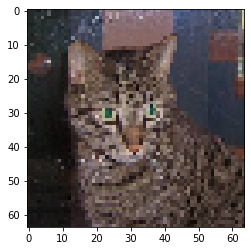

In [20]:
# 输入新的图片，经过预处理后，输入到预处理的网络中，预测这个图片是狗还是猫
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
path = './data/cats_and_dogs/train/cats/cat.1.jpg'
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images=images/255
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("这是狗")
else:
    print("这是猫")
plt.imshow(img) # 显示图片